# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

We can determine profitability by subtracting the 'State Bottle Cost' from the 'State Bottle Retail' and multiplying by the number of bottles sold. This will account for the price paid per bottle while also considering the total amount sold and the price they sell for. The item with the highest profitability is defined as the max of the quantity described above. 

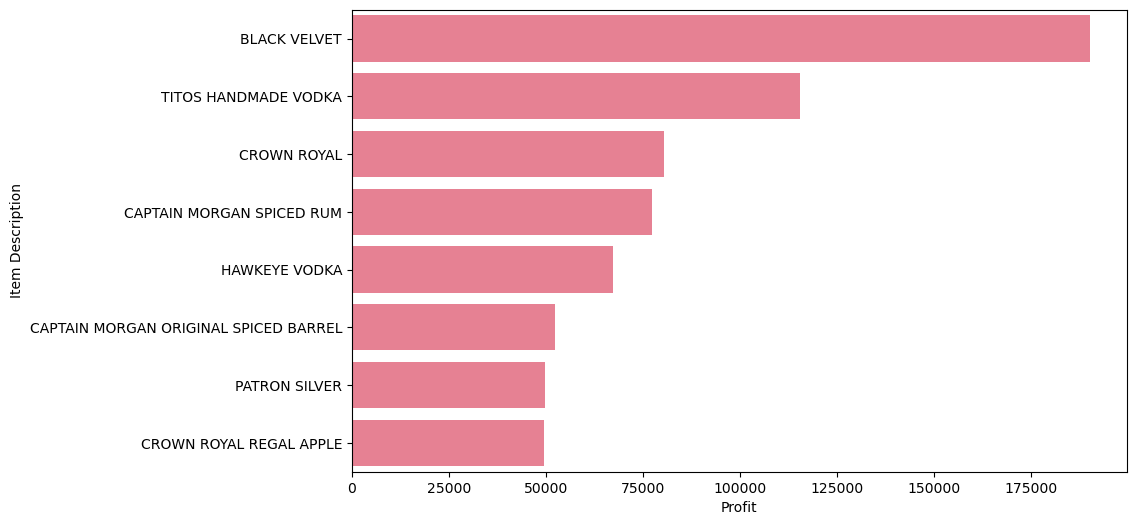

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/iowa.csv')

df['Profit'] = (df['State Bottle Retail'] - df['State Bottle Cost']) * df['Bottles Sold']

profit_by_item = df.groupby(['Item Number', 'Item Description'])['Profit'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=profit_by_item.sort_values('Profit', ascending=False).head(10),
    y="Item Description",
    x="Profit",
    errorbar=None
)

plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [73]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [74]:
print(x-y)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

A ValueError is thrown that states 'operands could not be broadcast together with shapes (3,) (2,)

In [75]:
print(x.reshape(-1,1)-y.reshape(1,-1))

[[-1 -4]
 [ 1 -2]
 [ 3  0]]


The code executes and outputs the result [[-1 -4]
 [ 1 -2]
 [ 3  0]]

In [76]:
print(x.reshape(1,-1)-y.reshape(-1,1))

[[-1  1  3]
 [-4 -2  0]]


This code also executes and is the transpose of the previous output

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

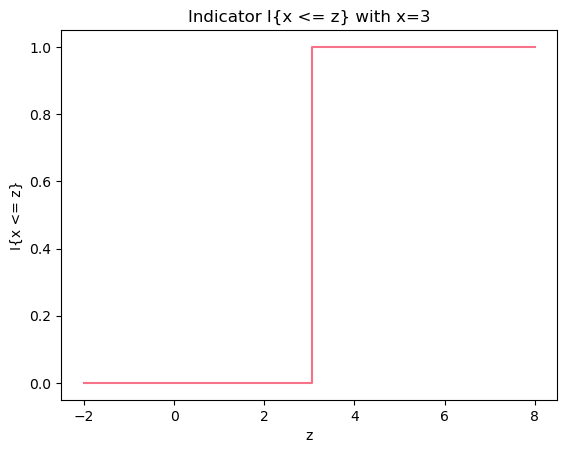

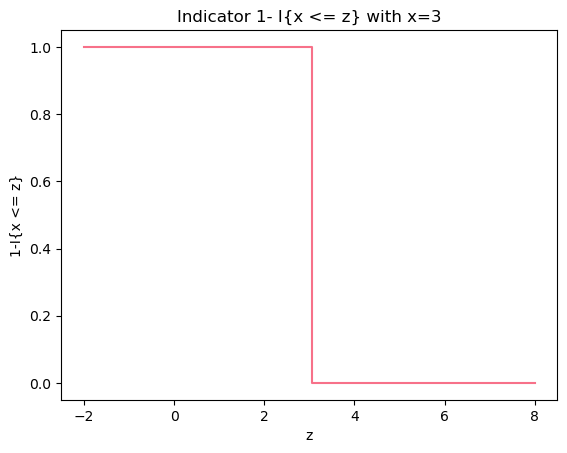

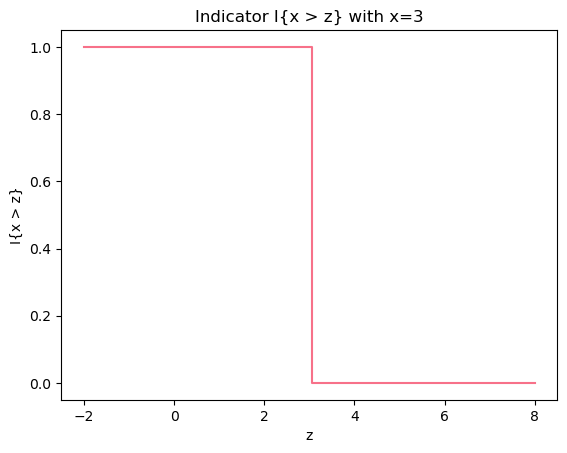

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x = 3
z = np.linspace(-2, 8, 100)
df_ind = pd.DataFrame({
    "z": z,
    "I{x <= z}": (x <= z).astype(int),
    "1-I{x <= z}": (1-(x <= z)).astype(int),
    "I{x > z}":  (x > z).astype(int)
})

# I{x <= z}
sns.lineplot(df_ind, x="z", y="I{x <= z}", drawstyle="steps-post")
plt.title("Indicator I{x <= z} with x=3")
plt.show()

# 1- I{x <= z}
sns.lineplot(df_ind, x="z", y="1-I{x <= z}", drawstyle="steps-post")
plt.title("Indicator 1- I{x <= z} with x=3")
plt.show()

# I{x > z}
sns.lineplot(df_ind, x="z", y="I{x > z}", drawstyle="steps-post")
plt.title("Indicator I{x > z} with x=3")
plt.show()


$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ as displayed in the above plots. $ 1- \mathbb{I}\{ x \le z \}$ and $ \mathbb{I}\{ x > z \}$ are both complements of $\mathbb{I}\{ x \le z \}$. The two statements are mutually exclusive and exhaustive meaning that for every value of z, the statement is true for exactly one of the statements. By subtracting the output of the indicator function from one, you are flipping all results.

In [78]:
def ecdf(x):
    # Compute ecdf function:
    Z = np.sort(np.unique(x)) # Extract and sort unique values for x
    compare = x.reshape(-1,1) <= Z.reshape(1,-1) # Compare x and Z values
    
    ecdf = np.mean(compare,axis=0) # Average over x indices for each z

    return ecdf, Z

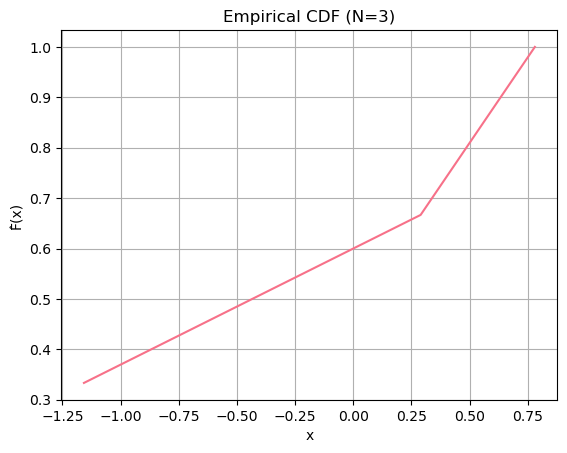

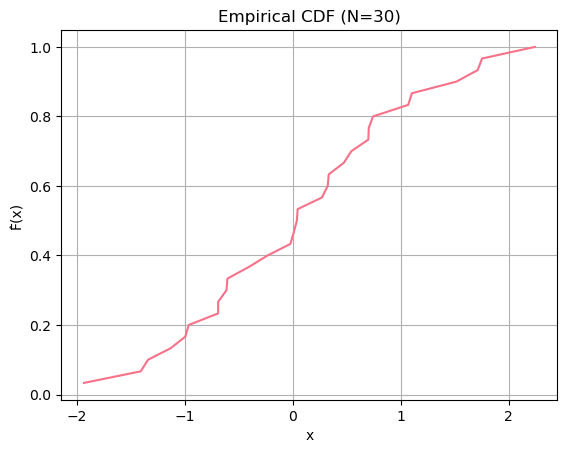

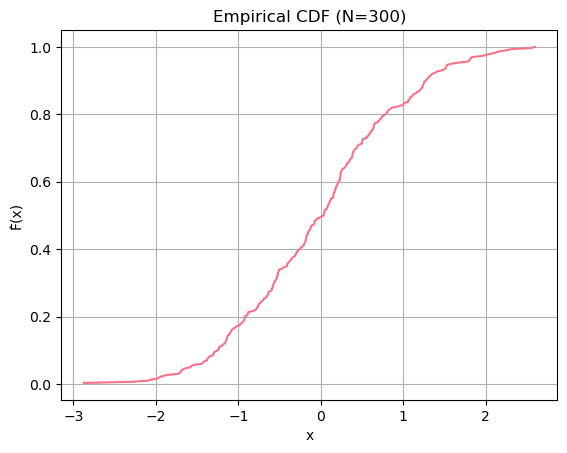

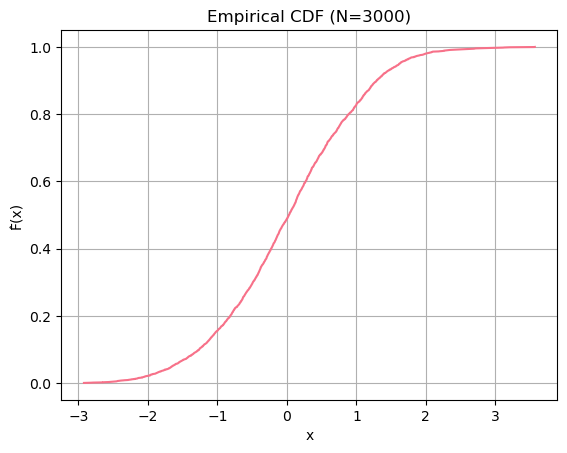

In [79]:
rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    F_hat, grid = ecdf(X)
    
    plt.figure()
    plt.plot(grid, F_hat)
    plt.title(f"Empirical CDF (N={N})")
    plt.xlabel("x")
    plt.ylabel("F̂(x)")
    plt.grid(True)
    plt.show()

As N increases, the ecdf curve gets smoother and begins to converge. The steps begin to disappear.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [83]:
def ecdf(x):
    # Compute ecdf function:
    Z = np.sort(x.unique()) # Extract and sort unique values for x
    compare = x.to_numpy().reshape(-1,1) <= Z.reshape(1,-1) # Compare x and Z values
    
    ecdf = np.mean(compare,axis=0) # Average over x indices for each z

    return ecdf, Z

In [91]:
def get_quantile(q, ecdf, Z):
    for i, fval in enumerate(ecdf):
        if fval >= q:
            return Z[i]
    return Z[-1]

In [92]:
def get_IQR(ecdf, Z):
    return get_quantile(0.75, ecdf, Z) - get_quantile(0.25, ecdf, Z)

In [93]:
def get_whiskers(ecdf, Z, iqr):
    return get_quantile(0.25, ecdf, Z) - (1.5*iqr), get_quantile(0.75, ecdf, Z) + (1.5*iqr)

In [94]:
def get_five_num_sum(ecdf, Z):
    return get_quantile(0, ecdf, Z), get_quantile(0.25, ecdf, Z), get_quantile(0.5, ecdf, Z), get_quantile(0.75, ecdf, Z), get_quantile(1, ecdf, Z)

In [95]:
def get_outliers(x, lower, upper):
    return (x < lower) | (x > upper)


=== Profit Summary ===
IQR (Q3 - Q1):           4591.00
Lower whisker:           -6305.50
Upper whisker:           12058.50
Five-number summary (min, Q1, median, Q3, max):
   23.00, 581.00, 1794.00, 5172.00, 170144.00

Outliers preview (first 10):
5     29440
8     19799
53    16316
56    16380
68    38730
70    31670
77    20872
78    35205
82    23678
87    22160
Name: student_count, dtype: int64

Pandas describe():
count      3798.000000
mean       4476.135334
std        7376.868923
min          23.000000
25%         581.250000
50%        1794.500000
75%        5172.000000
max      170144.000000
Name: student_count, dtype: float64


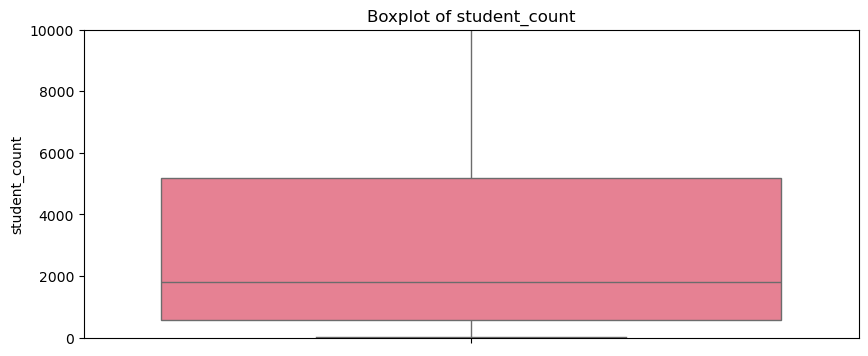

In [110]:
## Used ChatGPT to help clean up output
college_df = pd.read_csv('data/college_completion.csv')
F_hat, Z = ecdf(college_df['student_count'])

iqr = get_IQR(F_hat, Z)
lower, upper = get_whiskers(F_hat, Z, iqr)
five_num = get_five_num_sum(F_hat, Z)
outliers_mask = get_outliers(college_df['student_count'], lower, upper)

print("\n=== Profit Summary ===")
print(f"IQR (Q3 - Q1):           {iqr:.2f}")
print(f"Lower whisker:           {lower:.2f}")
print(f"Upper whisker:           {upper:.2f}")
print("Five-number summary (min, Q1, median, Q3, max):")
print("   " + ", ".join(f"{v:.2f}" for v in five_num))
print("\nOutliers preview (first 10):")
print(college_df.loc[outliers_mask, 'student_count'].head(10))
print("\nPandas describe():")
print(college_df['student_count'].describe())

plt.figure(figsize=(10, 4)) 
sns.boxplot(college_df['student_count'])
plt.ylim(0, 10000)   # zoom in to first 500 bottles, adjust as needed
plt.title("Boxplot of student_count")
plt.show()


The calculations appear to match between the built in functions and my code. There are extreme outliers in this numeric column which leads to the mean being significantly higher than the median.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?